In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
h_actual = 6.626e-34  # Planck's constant (Joule-second)
e = 1.602e-19  # Elementary charge (C)
W_actual = 4.5 * e  # Work function of the metal (J)

# 1. Generate Experimental Data (Refined Setup)
frequencies = np.linspace(4.5e14, 9.5e14, 50)  # Increased number of data points (Hz)
K_actual = h_actual * frequencies - W_actual  # Actual kinetic energy (J)
noise = np.random.normal(0, 0.05 * e, len(K_actual))  # Reduced noise in Joules
K_experiment = K_actual + noise

# 2. Pencarian Akar Persamaan (Finding the Threshold Frequency)
# The threshold frequency (f_threshold) satisfies h*f_threshold = W_actual
f_threshold = W_actual / h_actual
print(f"f_threshold: {f_threshold}")
print(f"K_actual: {K_actual}")
print(f"K_experiment: {K_experiment}")

f_threshold: 1087986718985813.4
K_actual: [-4.22730000e-19 -4.15968776e-19 -4.09207551e-19 -4.02446327e-19
 -3.95685102e-19 -3.88923878e-19 -3.82162653e-19 -3.75401429e-19
 -3.68640204e-19 -3.61878980e-19 -3.55117755e-19 -3.48356531e-19
 -3.41595306e-19 -3.34834082e-19 -3.28072857e-19 -3.21311633e-19
 -3.14550408e-19 -3.07789184e-19 -3.01027959e-19 -2.94266735e-19
 -2.87505510e-19 -2.80744286e-19 -2.73983061e-19 -2.67221837e-19
 -2.60460612e-19 -2.53699388e-19 -2.46938163e-19 -2.40176939e-19
 -2.33415714e-19 -2.26654490e-19 -2.19893265e-19 -2.13132041e-19
 -2.06370816e-19 -1.99609592e-19 -1.92848367e-19 -1.86087143e-19
 -1.79325918e-19 -1.72564694e-19 -1.65803469e-19 -1.59042245e-19
 -1.52281020e-19 -1.45519796e-19 -1.38758571e-19 -1.31997347e-19
 -1.25236122e-19 -1.18474898e-19 -1.11713673e-19 -1.04952449e-19
 -9.81912245e-20 -9.14300000e-20]
K_experiment: [-4.36791663e-19 -4.09714291e-19 -4.11524707e-19 -3.98628260e-19
 -4.05863628e-19 -3.86698038e-19 -3.95203548e-19 -3.85407812e-19


In [3]:
# 3. Interpolasi dan Pencocokan Kurva (Curve Fitting)
def photoelectric_model(f, h, W):
    return h * f - W

# Fit the experimental data
params, covariance = curve_fit(photoelectric_model, frequencies, K_experiment)
h_fit, W_fit = params

print(f"""
h_fit: {h_fit}
W_fit: {W_fit}
""")


h_fit: 6.733917938447077e-34
W_fit: 7.288527593499326e-19



In [4]:
# 4. Diferensial dan Integral Numerik (Calculate Errors)
# Calculate percentage errors
h_error = abs(h_fit - h_actual) / h_actual * 100  # Error for Planck's constant
W_error = abs(W_fit - W_actual) / W_actual * 100  # Error for work function

print(f"""
h_error: {h_error}
W_error: {W_error}
""")


h_error: 1.6287041721563096
W_error: 1.1031709460303363



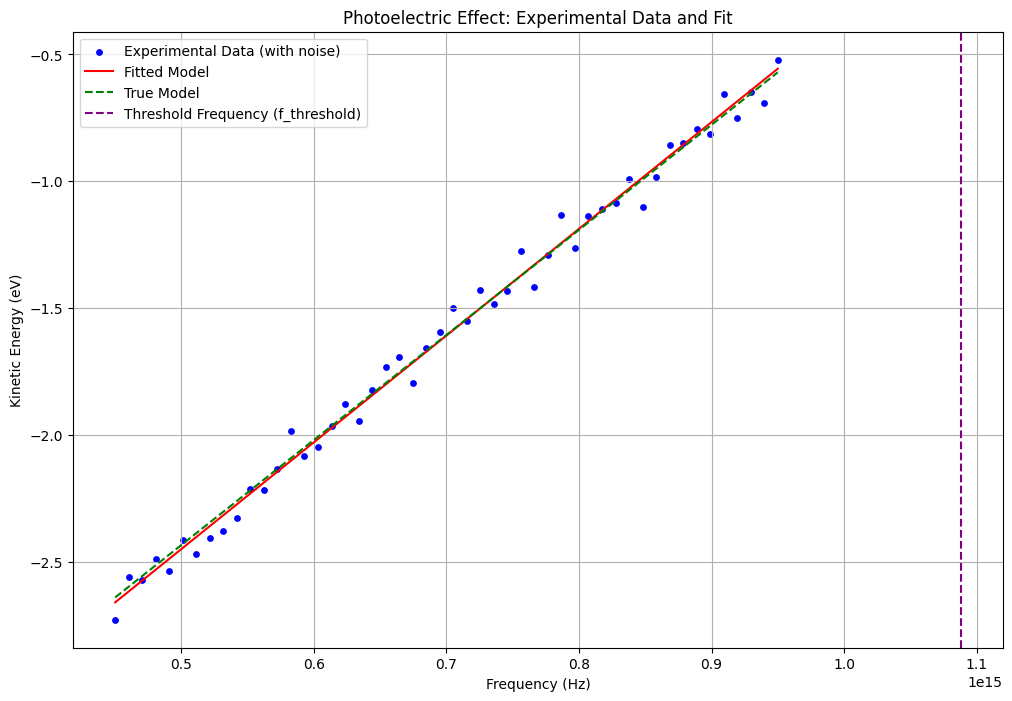

In [5]:
# Plot the Results
plt.figure(figsize=(12, 8))
plt.scatter(frequencies, K_experiment / e, color='blue', label='Experimental Data (with noise)', s=15)
plt.plot(frequencies, photoelectric_model(frequencies, h_fit, W_fit) / e, color='red', label='Fitted Model')
plt.plot(frequencies, K_actual / e, '--', color='green', label='True Model')
plt.axvline(f_threshold, color='purple', linestyle='--', label='Threshold Frequency (f_threshold)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Kinetic Energy (eV)')
plt.title('Photoelectric Effect: Experimental Data and Fit')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Return refined results
print(f"""
f_threshold : {f_threshold}
h_fit       : {h_fit}
W_fit       : {W_fit}
h_error     : {h_error}
W_error     : {W_error}
""")


f_threshold : 1087986718985813.4
h_fit       : 6.733917938447077e-34
W_fit       : 7.288527593499326e-19
h_error     : 1.6287041721563096
W_error     : 1.1031709460303363



<span style="color:#90EE90">Hadi: Explain to me about 4 methods that you have mentioned earlier in detail</span>


Here’s a detailed explanation of the **4 numerical methods** applied to the photoelectric effect phenomenon, along with their significance and implementation steps:

---

### **1. Pencarian Akar Persamaan (Finding the Root of an Equation)**

#### Explanation:
This method helps determine the **threshold frequency** ($f_{\text{threshold}}$), where the photoelectric effect starts occurring. The equation to solve is:
$$
h f_{\text{threshold}} = W
$$
Where:
- $h$ is Planck's constant,
- $W$ is the work function of the metal.

By rearranging, the threshold frequency is:
$$
f_{\text{threshold}} = \frac{W}{h}
$$
This marks the minimum frequency of photons required to eject an electron.

#### Implementation Steps:
1. Input values of $h$ (Planck's constant) and $W$ (work function of the metal).
2. Solve for $f_{\text{threshold}}$ using the formula above.
3. Compare this frequency to experimental photon frequencies to determine if electrons will be emitted.

#### Application in the Photoelectric Effect:
This method sets the boundary condition for observing the phenomenon. Photons with frequencies below $f_{\text{threshold}}$ cannot eject electrons, even if their intensity increases.

---

### **2. Interpolasi dan Pencocokan Kurva (Interpolation and Curve Fitting)**

#### Explanation:
In experiments, data points are often discrete (e.g., frequency vs. kinetic energy of ejected electrons). Interpolation and curve fitting allow us to:
1. Estimate missing data points between the experimental data.
2. Find the best-fit model (linear or nonlinear) that describes the relationship between frequency ($f$) and kinetic energy ($K$).

The theoretical relationship is:
$$
K = h f - W
$$
Where $h$ and $W$ are constants to be determined from the data.

#### Implementation Steps:
1. Collect experimental data (frequency vs. kinetic energy).
2. Use curve-fitting algorithms (e.g., least squares) to adjust $h$ and $W$ to minimize the error between the theoretical model and experimental data.
3. Visualize the fit to ensure the model describes the data accurately.

#### Application in the Photoelectric Effect:
- Determines $h$ (Planck's constant) and $W$ (work function) from experimental data.
- Validates the linear relationship between $K$ and $f$.

---

### **3. Diferensial dan Integral Numerik (Numerical Differentiation and Integration)**

#### Explanation:
This method is used for:
1. **Differentiation**: To calculate the rate of change of kinetic energy ($K$) with respect to frequency ($f$):
   $$
   \frac{dK}{df} = h
   $$
   This provides a numerical estimate of Planck's constant.

2. **Integration**: To calculate the total energy or the number of electrons emitted over a range of photon frequencies:
   $$
   N_{\text{elektron}} = \int_{f_{\text{threshold}}}^{f_{\text{max}}} I(f) \, df
   $$
   Where $I(f)$ is the photon intensity distribution.

#### Implementation Steps:
1. Use numerical differentiation methods (e.g., finite differences) to estimate $h$.
2. Use numerical integration methods (e.g., Trapezoidal or Simpson’s rule) to calculate total energy or electron emission.

#### Application in the Photoelectric Effect:
- Differentiation validates the linearity of the $K$-$f$ relationship.
- Integration calculates cumulative effects like total electrons emitted for a given spectrum of light.

---

### **4. Optimasi (Optimization)**

#### Explanation:
Optimization adjusts the theoretical model parameters ($h$ and $W$) to minimize the difference (error) between experimental and theoretical values. The error is often calculated as:
$$
\text{Error} = \sum \left(K_{\text{experiment}} - K_{\text{model}}\right)^2
$$
Optimization ensures the best fit of the theoretical equation:
$$
K = h f - W
$$

#### Implementation Steps:
1. Define an objective function to minimize (e.g., the squared error).
2. Use optimization algorithms (e.g., gradient descent, least squares) to adjust $h$ and $W$.
3. Iterate until the error converges to a minimum.

#### Application in the Photoelectric Effect:
- Fine-tunes $h$ and $W$ for maximum accuracy.
- Improves model precision, especially for noisy or limited experimental data.

---

### Summary Table of Methods:

| **Method**                | **Goal**                                           | **Key Outputs**                 |
|---------------------------|---------------------------------------------------|---------------------------------|
| **Pencarian Akar**         | Find threshold frequency ($f_{\text{threshold}}$) | Minimum photon energy needed   |
| **Interpolasi & Fit**      | Fit experimental data to the model                | $h$ and $W$ from data       |
| **Diferensial & Integral** | Analyze rate of change and total energy/electrons | Validate $h$; calculate totals|
| **Optimasi**               | Minimize errors in the theoretical model          | Improved $h$ and $W$        |

---

These methods, when combined, offer a comprehensive numerical approach to analyzing the photoelectric effect. Let me know if you’d like to delve deeper into any specific method!

<span style="color:#90EE90">Hadi: Given those four methods, why might they lead to significant errors?</span>


Significant errors in the application of these numerical methods to the photoelectric effect can arise due to a variety of factors. Here are the potential sources of errors, grouped by method, along with possible reasons for inaccuracies:

---

### **1. Pencarian Akar Persamaan (Finding the Root of an Equation)**

#### Potential Sources of Error:
1. **Incorrect Input Values**:
   - If the work function ($W$) or Planck's constant ($h$) is inaccurately measured or rounded, the threshold frequency ($f_{\text{threshold}}$) will also be incorrect.

2. **Physical Assumptions**:
   - Assumes ideal behavior where the work function and Planck's constant are uniform for the material. Real materials may exhibit slight variations due to impurities or surface conditions.

3. **Precision in Numerical Computation**:
   - Numerical solvers may suffer from truncation or round-off errors, especially if the constants are provided with limited significant figures.

---

### **2. Interpolasi dan Pencocokan Kurva (Interpolation and Curve Fitting)**

#### Potential Sources of Error:
1. **Experimental Noise**:
   - Random noise in the experimental kinetic energy ($K$) data can significantly affect the fit, leading to incorrect estimates for $h$ and $W$.

2. **Inadequate Model**:
   - If the true relationship deviates slightly from the linear model ($K = h f - W$), the fitted parameters will be biased.

3. **Limited Data**:
   - Sparse data points may not capture the full trend of the relationship, leading to poor extrapolation or interpolation.

4. **Overfitting or Underfitting**:
   - Using a model that is too simple or too complex may fail to capture the true underlying behavior of the system.

---

### **3. Diferensial dan Integral Numerik (Numerical Differentiation and Integration)**

#### Potential Sources of Error:
1. **Differentiation Amplifies Noise**:
   - Numerical differentiation is highly sensitive to small variations in data, so noisy data can result in large errors in $h$.

2. **Integration Errors**:
   - Numerical integration methods (e.g., Trapezoidal or Simpson’s Rule) may be inaccurate if the data resolution is too low or if the integration bounds are imprecisely determined.

3. **Approximation Errors**:
   - The methods rely on discretizing data, which introduces approximation errors, especially if the data points are unevenly spaced.

---

### **4. Optimasi (Optimization)**

#### Potential Sources of Error:
1. **Local Minima in Optimization**:
   - The optimization algorithm may converge to a local minimum rather than the global minimum, leading to incorrect parameter values.

2. **Poor Initial Guesses**:
   - Optimization relies on good starting values for $h$ and $W$. Poor initial guesses may result in the algorithm failing to converge or finding incorrect solutions.

3. **Error Metric Selection**:
   - The choice of the error metric (e.g., sum of squared errors) might not appropriately capture the true deviation between experimental and theoretical values.

4. **Over-sensitivity to Outliers**:
   - Outliers in the data can heavily bias the optimization process, leading to large deviations in the fitted parameters.

---

### **Other General Factors Contributing to Errors**

1. **Experimental Setup Issues**:
   - Inaccuracies in measuring the frequency of light or the kinetic energy of ejected electrons can introduce systematic errors.

2. **Material Variability**:
   - The work function $W$ may vary across different regions of the metal due to surface imperfections or contamination.

3. **Quantum Effects Not Modeled**:
   - The classical linear model may not account for quantum mechanical phenomena, such as variations in electron binding energy across different energy levels.

4. **Numerical Precision**:
   - The limitations of floating-point arithmetic can result in rounding errors, especially when working with very small constants like $h$ and $W$.

---

### Summary of Why Significant Errors Occur:

| **Category**                 | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| **Input/Data Issues**         | Noise, outliers, sparse data, or inaccurate measurements.                      |
| **Model Limitations**         | Deviations from the theoretical model due to physical or quantum complexities. |
| **Algorithmic Issues**        | Poor optimization, local minima, or over-sensitivity to noise/outliers.        |
| **Numerical Precision**       | Rounding, truncation, or approximation errors in computations.                 |

---

### Steps to Reduce Errors:
1. Use higher-resolution and more precise experimental data.
2. Apply advanced noise-reduction techniques, such as filtering or smoothing.
3. Test multiple fitting algorithms and use robust methods that handle outliers.
4. Increase the number of data points and refine the experimental range.
5. Validate results against reference data and theoretical predictions.

Would you like more specific suggestions for any of these methods?